# Análise de Churn

A análise de dados desempenha um papel fundamental na identificação de padrões de comportamento e na tomada de decisões estratégicas dentro das empresas. No contexto de negócios baseados em assinaturas, como empresas SaaS, compreender o comportamento dos clientes ao longo do tempo é essencial para manter uma base de usuários ativa e engajada.

Neste case, o objetivo é utilizar técnicas de estatística descritiva e análise exploratória de dados para investigar uma possível elevação na taxa de churn — ou seja, o cancelamento de contratos por parte dos clientes. A partir de um conjunto de dados contendo informações cadastrais e registros de uso da plataforma, espera-se que o analista consiga validar a hipótese levantada pela equipe e gerar insights úteis para as áreas de produto e negócios.

Esse tipo de análise é valioso porque permite identificar tendências, levantar hipóteses sobre causas da rotatividade e, eventualmente, antecipar ações que reduzam perdas. Mais do que apenas confirmar se o churn aumentou, o desafio está em traduzir os dados em respostas claras, visuais e acionáveis, apoiando a tomada de decisão com base em evidências concretas.



<b>Missão:</b>

* Validar a hipótese levantada sobre o aumento do churn;
* Realizar uma análise exploratória para identificar padrões, comportamentos ou informações relevantes que possam apoiar a equipe de negócios;
* Elaborar um relatório com os principais insights obtidos.


<b>Perguntas-gatilho para orientar a análise:</b>

* A taxa de churn aumentou nos últimos meses? Em quais períodos ela foi mais crítica?
* Há diferença de churn entre planos mensais, trimestrais e anuais?
* O uso da plataforma é menor entre os clientes que cancelaram?
* Empresas com contador têm menor probabilidade de churn?
* Determinados setores ou portes de empresa apresentam maior rotatividade?

In [27]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('customer_churn_with_months.csv')

# Dicionário de Variáveis (Versão Resumida)

| Variável                            | Descrição                                                |
|-------------------------------------|----------------------------------------------------------|
| `ID`                                | Identificador único do cliente                           |
| `Tipo de empresa`                   | Categoria (MEI, ME, EPP, etc.)                           |
| `Fundação da empresa`               | Ano de fundação                                          |
| `Possui mais de um sócio`           | Empresa tem mais de um sócio? (Sim/Não)                  |
| `Funcionários`                      | Nº ou faixa de funcionários                              |
| `mes_churn`                         | Mês em que ocorreu o churn                               |
| `Meses de permanência`              | Meses de contrato até mai/2025                           |
| `Utiliza serviços financeiros`      | Usa serviços financeiros? (Sim/Não)                      |
| `PossuiContador`                    | Possui contador? (Sim/Não)                               |
| `Faz conciliação bancária`          | Faz conciliação bancária? (Manual/Automática)            |
| `Contrato`                          | Tipo de contrato (Mês-a-mês, Trimestral, etc.)           |
| `Emite boletos`                     | Emite boletos? (Sim/Não ou 1/0)                          |
| `Tipo de pagamento`                 | Forma de pagamento utilizada                             |
| `Receita mensal`                    | Receita mensal gerada                                    |
| `Receita total`                     | Receita acumulada até o momento                          |
| `Churn`                             | Cliente cancelou? (Sim/Não)                              |

### Frequência de Uso (por módulo)

| Variável                            | Descrição                              |
|-------------------------------------|----------------------------------------|
| `Frequência: Módulo financeiro`     | Uso do módulo financeiro               |
| `Frequência: Emissão de nota fiscal`| Uso da emissão de NF                   |
| `Frequência: Integração bancária`   | Uso da integração bancária             |
| `Frequência: Módulo de vendas`      | Uso do módulo de vendas                |
| `Frequência: Relatórios`            | Uso de relatórios                      |
| `Frequência: APIs de integração`    | Uso de APIs                            |

In [23]:
# Exploração univariada
df.head()

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn,mes_churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,...,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,29.85,29.85,Não,NaN
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,56.95,1889.50,Não,NaN
2,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Cartão de crédito - pagamento único,42.30,1840.75,Não,NaN
3,7,Pequena empresa,2019,Não,6 ou mais funcionários,22,Sim,Sim,manual,Pouco uso,...,Uso frequente,Pouco uso,Mês-a-mês,1,Yes,Cartão de crédito - mês a mês,89.10,1949.40,Não,NaN
4,8,Micro empresa,2019,Não,até 5 funcionários,10,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Mês-a-mês,0,No,Boleto - mês a mês,29.75,301.90,Não,NaN


In [24]:
# Visão geral dos tipos de dados e valores nulos
overview = pd.DataFrame({
    "Tipo": df.dtypes,
    'Nulos': df.isnull().sum(),
    '% Nulos': df.isnull().sum()*100,
    'Valores Únicos': df.nunique(),
    'Exemplo de Valores': df.apply(lambda x: x.unique()[:3])
})
overview

,Tipo,Nulos,% Nulos,Valores Únicos,Exemplo de Valores
ID,int64,0,0,7043,"[1, 2, 4]"
Tipo de empresa,object,0,0,2,"[Micro empresa, Pequena empresa]"
Fundação da empresa,int64,0,0,21,"[2016, 2018, 2019]"
Possui mais de um sócio,object,0,0,2,"[Sim, Não]"
Funcionários,object,0,0,2,"[até 5 funcionários, 6 ou mais funcionários]"
Meses de permanência,int64,0,0,73,"[1, 34, 45]"
Utiliza serviços financeiros,object,0,0,2,"[Não, Sim]"
PossuiContador,object,682,68200,2,"[nan, Não , Sim]"
Faz conciliação bancária,object,0,0,3,"[automática, manual, não faz]"
Frequência de utilização de feature do sistema: Módulo financeiro,object,0,0,3,"[Pouco uso, Uso frequente, Nunca utilizou]"


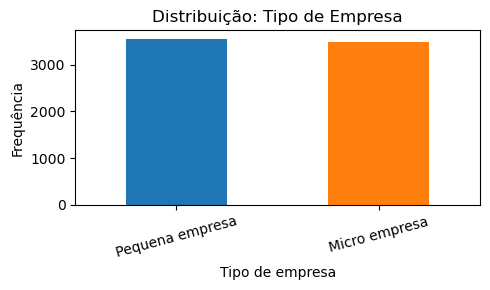

(Tipo de empresa
 Pequena empresa    3555
 Micro empresa      3488
 Name: count, dtype: int64,
 Tipo de empresa
 Pequena empresa    50.47565
 Micro empresa      49.52435
 Name: proportion, dtype: float64,
 array(['Micro empresa', 'Pequena empresa'], dtype=object))

In [ ]:
# Análise da coluna 'Tipo de empresa'

col = 'Tipo de empresa'

# Valores únicos (checar escrita)
valores_unicos = df[col].unique()

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

# Gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar',color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição: Tipo de Empresa')
plt.xlabel('Tipo de empresa')
plt.ylabel('Frequência')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq, valores_unicos

valores únicos: [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Ano mínimo: 2001
Ano máximo: 2021
Média: 2016.736475933551
Mediano: 2018.0
Desvio padrão: 4.582310729077341
count    7043.000000
mean     2016.736476
std         4.582311
min      2001.000000
25%      2016.000000
50%      2018.000000
75%      2020.000000
max      2021.000000
Name: Fundação da empresa, dtype: float64
Top 5 anos de fundação:
Fundação da empresa
2016    1029
2018     990
2019     982
2021     975
2017     969
Name: count, dtype: int64


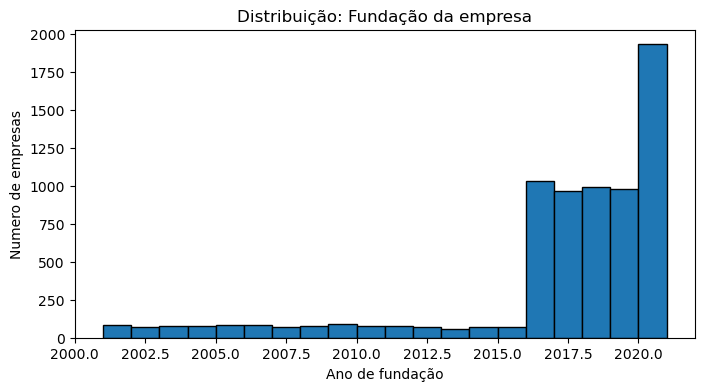

In [32]:
# Fundação da Empresa

col = 'Fundação da empresa'
anos = df[col]
print("valores únicos:", sorted(anos.unique()))
print('Ano mínimo:', anos.min())
print('Ano máximo:', anos.max())
print('Média:', anos.mean())
print('Mediano:', anos.median())
print('Desvio padrão:', anos.std())

print(anos.describe())

# Frequência dos anos comuns (top 5)
top_anos = anos.value_counts().head(5)
print('Top 5 anos de fundação:')
print(top_anos)

# Histograma para ver a concentração
plt.figure(figsize=(8,4))
plt.hist(anos, bins=20, edgecolor='black')
plt.title('Distribuição: Fundação da empresa')
plt.xlabel('Ano de fundação')
plt.ylabel('Numero de empresas')
plt.show()
